## Importing of modules and loading of dataset

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
import sklearn.decomposition


missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
cereal_data = pd.read_csv("cereal-yield-vs-gdp-per-capita.csv",na_values = missing_values)
energy_data = pd.read_csv("electricity-generation.csv",na_values = missing_values)
meat_data =pd.read_csv("meat-consumption-vs-gdp-per-capita.csv", na_values = missing_values)
health_data =pd.read_csv("healthcare-expenditure-vs-gdp.csv",na_values = missing_values)



### Cleaning of the Dataset
##### Extracting the data between 1990 -2020 and droping the redundant columns 

In [3]:
energy_data = energy_data[energy_data.Year >=1990]
meat_data = meat_data.drop(['Entity','GDP ','Population', 'Continent'],axis =1)
meat_data = meat_data[meat_data.Year >=1990]
health_data = health_data.drop(['Entity','Population', 'Continent'],axis =1)
health_data =health_data[health_data.Year >=1990]
cereal_data = cereal_data.drop(['Entity','Population','GDP ', 'Continent'],axis =1)
cereal_data =cereal_data[cereal_data.Year >=1990]

### Merging of the Dataset

In [4]:
data = pd.merge(pd.merge(pd.merge(energy_data , meat_data, on=['Code', 'Year']), health_data , on=['Code' , 'Year']),cereal_data , on=['Code' , 'Year'])
data.head()

,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
0,Albania,ALB,1990,3.30,17.00,NaN,2548.112549,2794.399902
1,Albania,ALB,1991,3.82,20.61,NaN,1908.095337,2071.899902
2,Albania,ALB,1992,3.40,20.07,NaN,1822.334717,2158.600098
3,Albania,ALB,1993,3.53,22.12,NaN,2056.373047,2685.000000
4,Albania,ALB,1994,3.94,24.94,NaN,2288.676025,2460.899902


### Training set for the model
##### For training purpose we select 5 countries with good GDP and 1 country with least. 

In [5]:
data =data.loc[data['Code'].isin(["IND","USA","FRA","DEU","JPN","COG"])]             # add countries of your choice. 

pd.set_option('display.max_rows', 500)             
data.head()

,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
27630884,Congo,COG,2000,0.29,14.60,57.380070,3699.228516,753.900024
27630885,Congo,COG,2001,0.33,12.83,82.970512,3813.747803,775.000000
27630886,Congo,COG,2002,0.39,14.95,67.666100,3938.432129,772.000000
27630887,Congo,COG,2003,0.40,21.28,76.136498,3929.600098,780.700012
27630888,Congo,COG,2004,0.39,20.38,78.134689,4052.513184,776.400024


#### First lets compare the economic growth of selected countries

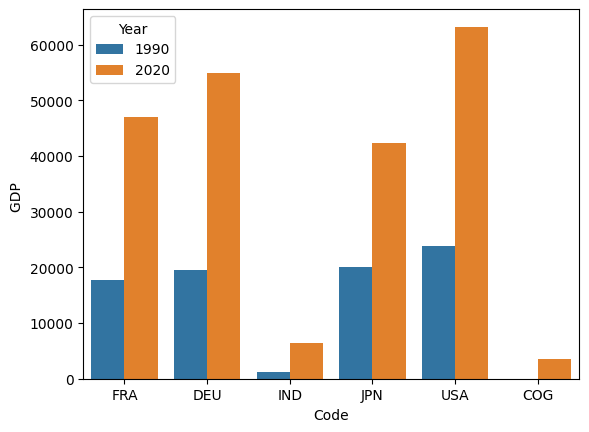

The compound annual growth rate of France is 0.03319
The compound annual growth rate of India is 0.05793
The compound annual growth rate of Germany is 0.03515
The compound annual growth rate of United States is 0.03297
The compound annual growth rate of Japan is 0.02540


In [41]:
compare_data1 = data[data.Year ==1990 ]
compare_data2 = data[data.Year ==2020 ]
frames = [compare_data1, compare_data2]
compare_data =pd.concat(frames)
compare_data
sns.barplot(x = 'Code', y = 'GDP ', hue = 'Year', data = compare_data)
plt.show()

yoho, we can analyze from the above graph that these countries had a good growth from 1990 . Specially Congo which is not even visible in 1990 had a good growth. 

#### Cleaning na values
##### filling na values with ffill and bfill asuming the data is same for the rest of na values.

<AxesSubplot:xlabel='health_expenditure', ylabel='Year'>

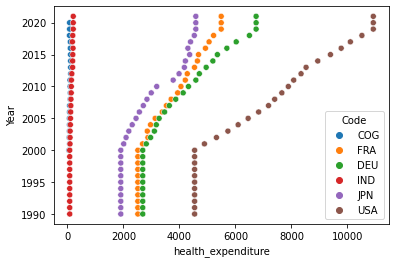

In [6]:
data["Meat_quantity"] = data.groupby('Entity')['Meat_quantity'].transform(lambda x: x.ffill().bfill())
data["health_expenditure"] = data.groupby('Entity')['health_expenditure'].transform(lambda x: x.ffill().bfill())
data["Electricity(TWh)"] = data.groupby('Entity')['Electricity(TWh)'].transform(lambda x: x.ffill().bfill())
data["Cereal yield "] = data.groupby('Entity')['Cereal yield '].transform(lambda x: x.ffill().bfill())
data["GDP "] = data.groupby('Entity')['GDP '].transform(lambda x: x.ffill().bfill())

sns.scatterplot(x="health_expenditure",
                    y="Year",
                    hue="Code",
                    data=data)

##### Oops, from the above graph we can infer that the data above 2018 and below 2000 for health expenditure is almost equal, Working on these kind of data set is generally not prefered. So we will try to trim the dataset . 

<AxesSubplot:xlabel='health_expenditure', ylabel='Year'>

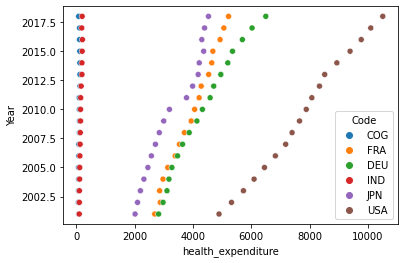

In [7]:
data = data[(data['Year'] > 2000) & (data['Year'] <= 2018)]
data.set_index('Entity')
sns.scatterplot(x="health_expenditure",
                    y="Year",
                    hue="Code",
                    data=data)


#### yoho, The above plot seems to be fine . So we can move on with this dataset

#### Checking the null values

In [8]:
print("Null Values: ")
print(data.isnull().sum())


Null Values: 
Entity                0
Code                  0
Year                  0
Electricity(TWh)      0
Meat_quantity         0
health_expenditure    0
GDP                   0
Cereal yield          0
dtype: int64


#### Analyzing share of each categories for the selected countries

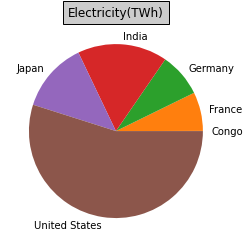

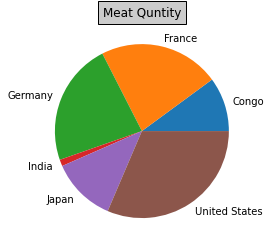

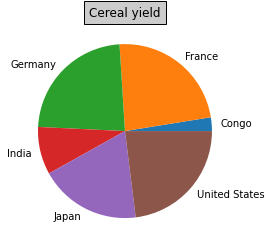

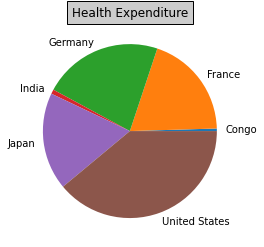

In [9]:
pie_data = data[data.Year == 2015]
pie_data =pie_data.set_index('Code')
pie_data
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Electricity(TWh)"], labels=pie_data['Entity'], )
plt.title("Electricity(TWh)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Meat_quantity"], labels=pie_data['Entity'])
plt.title("Meat Quntity", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Cereal yield "], labels=pie_data['Entity'])
plt.title("Cereal yield", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["health_expenditure"], labels=pie_data['Entity'])
plt.title("Health Expenditure", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

OOOHHHH, the electricity consumption of US is quite a lot. Where as for meat consumption India is way behind these countries. For Crops production I think all these countries have very small difference except for Congo. The graph of health looks pretty much similar to their GDP.

#### Correlation



Correlation co-effecient :
Health Expenditure: 0.9931311267310295
Meat Production: -0.202484167707048
Energy Consumption: 0.7270979595174085
Cereal produced: 0.8702164512359019


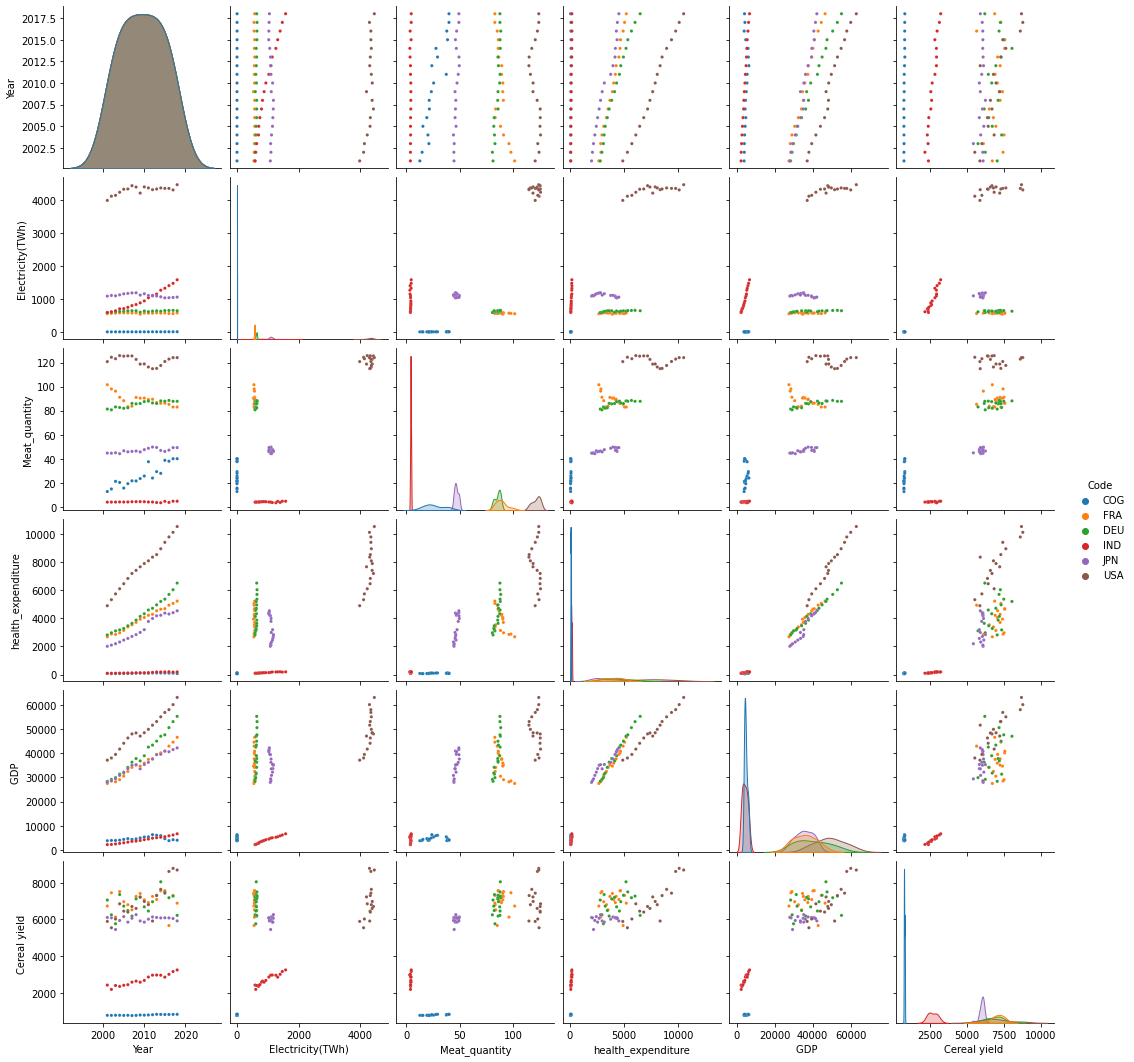

In [11]:
USA_data = data[data.Code == 'USA']
print("Correlation co-effecient :")

x = USA_data.loc[:,"Electricity(TWh)"]         #0.62 -> moderately correlated
y = USA_data.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
z = USA_data.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
c = USA_data.loc[:,"Cereal yield "]         #0.275 -> Weakly  correlated
g = USA_data.loc[:,"GDP "]      

print("Health Expenditure:",(np.corrcoef(z,g))[0][1])
print("Meat Production:",(np.corrcoef(y,g))[0][1])
print("Energy Consumption:",(np.corrcoef(x,g))[0][1])
print("Cereal produced:",(np.corrcoef(c,g))[0][1])

sns.pairplot(data, kind="scatter", hue="Code", plot_kws=dict(s=10, edgecolor="white", linewidth=0.09))
plt.show()

We can infer from the above graph and correlation co-efficient(-0.202) that Meat production is not much related in predicting GDP of any country<br>
Lets analyze meat produciton more carefully from the below reggression chart

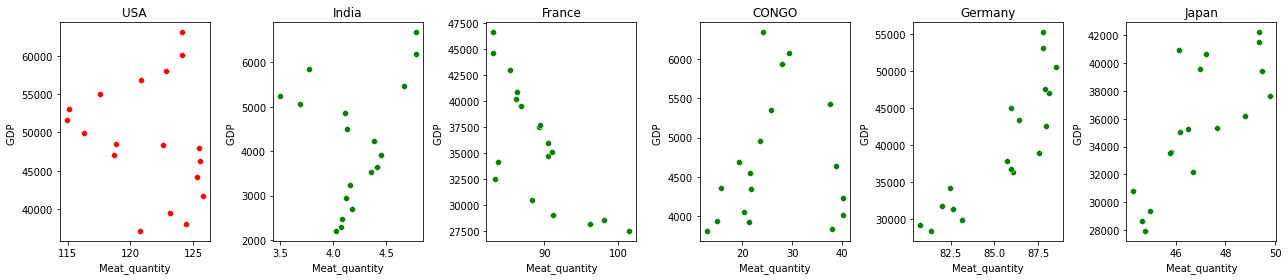

In [12]:

IND_data = data[data.Code == 'IND']
FRA_data = data[data.Code == 'FRA']
COG_data = data[data.Code == 'COG']
DEU_data = data[data.Code == 'DEU']
JPN_data = data[data.Code == 'JPN']

plt.rcParams["figure.figsize"] = [18.00, 4.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 6)
sns.scatterplot(data=USA_data, x="Meat_quantity", y="GDP ", color ="red",ax=axes[0]).set(title='USA')
sns.scatterplot(data=IND_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[1]).set(title='India')
sns.scatterplot(data=FRA_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[2]).set(title='France')
sns.scatterplot(data=COG_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[3]).set(title='CONGO')
sns.scatterplot(data=DEU_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[4]).set(title='Germany')
sns.scatterplot(data=JPN_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[5]).set(title='Japan')
plt.show()

As expected the scatter plot is completely random and not showing any pattern , therfore, we will drop Meat consumption and move forward with dataset
<br>Also, the regression plot for USA,france, Germany and japan almost look same. Therefore we'll try to reduce our dataset and move on with USA, India and Congo

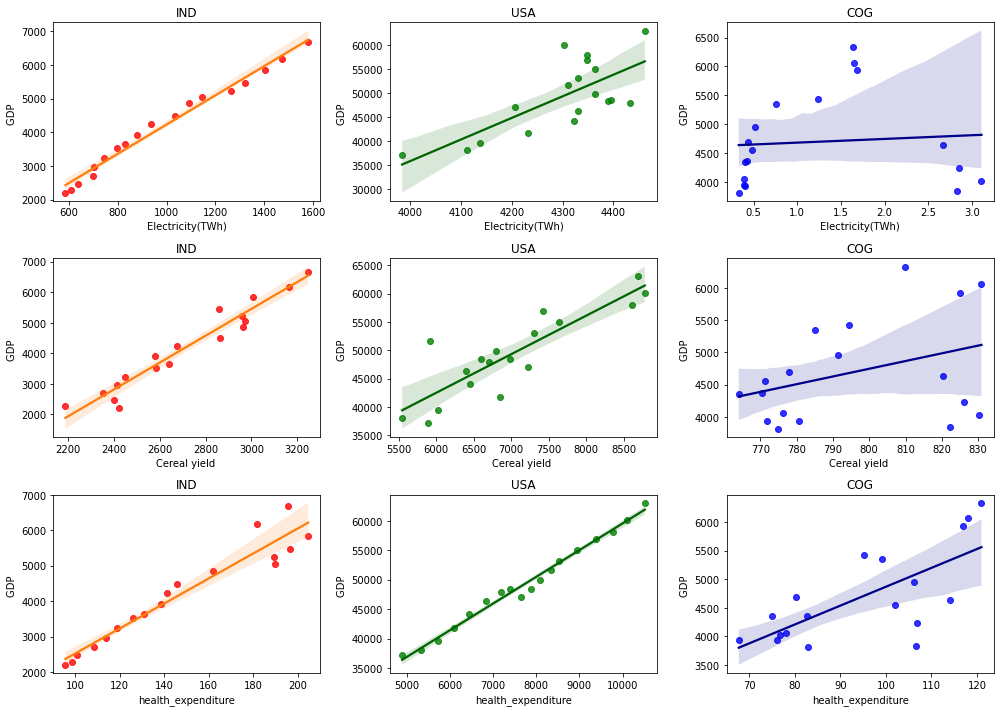

In [14]:
data = data.drop(['Meat_quantity'],axis =1)   ## droping meat coulumn

NEW_DATA = [USA_data,IND_data,COG_data]
NEW_DATA=pd.concat(NEW_DATA)
plt.rcParams["figure.figsize"] = [14.00, 10.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 3)
sns.regplot(x="Electricity(TWh)", y="GDP ", line_kws={"color": "C1"},color="red",data=IND_data,ax=axes[0][0]).set(title = "IND")
sns.regplot(x="Electricity(TWh)", y="GDP ",line_kws={"color": "darkgreen"},color="green",data=USA_data,ax=axes[0][1]).set(title = "USA")
sns.regplot(x="Electricity(TWh)", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[0][2]).set(title = "COG")
sns.regplot(x="Cereal yield ", y="GDP ",line_kws={"color": "C1"},color="red", data=IND_data,ax=axes[1][0]).set(title = "IND")
sns.regplot(x="Cereal yield ", y="GDP ", line_kws={"color": "darkgreen"},color="green", data=USA_data,ax=axes[1][1]).set(title = "USA")
sns.regplot(x="Cereal yield ", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[1][2]).set(title = "COG")
sns.regplot(x="health_expenditure", y="GDP ",line_kws={"color": "C1"},color="red", data=IND_data,ax=axes[2][0]).set(title = "IND")
sns.regplot(x="health_expenditure", y="GDP ",  line_kws={"color": "darkgreen"},color="green",data=USA_data,ax=axes[2][1]).set(title = "USA")
sns.regplot(x="health_expenditure", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[2][2]).set(title = "COG")


plt.show()


Yipieee , The above regression plot shows the linear relationship between GDP and different categories.

## PCA<br>
Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity.

        PCA1      PCA2         Entity
0   2.076928  1.824769  United States
1   2.164302  1.644601  United States
2   2.333066  1.449069  United States
3   2.619273  1.262098  United States
4   2.677029  1.073570  United States
5   2.776487  0.882029  United States
6   2.941782  0.692169  United States
7   2.937246  0.493608  United States
8   2.980795  0.285165  United States
9   3.055054  0.101062  United States
10  3.062411 -0.096092  United States
11  2.969665 -0.289680  United States
12  3.273830 -0.485133  United States
13  3.462855 -0.673145  United States
14  3.558366 -0.859557  United States
15  3.856127 -1.052431  United States
16  3.979795 -1.244651  United States
17  4.128135 -1.431027  United States
18 -1.638559  1.507815          India
19 -1.657533  1.318140          India
20 -1.598789  1.127080          India
21 -1.573722  0.938219          India
22 -1.544149  0.746720          India
23 -1.509500  0.556734          India
24 -1.453216  0.367128          India
25 -1.420433

Text(0, 0.5, 'PCA 2')

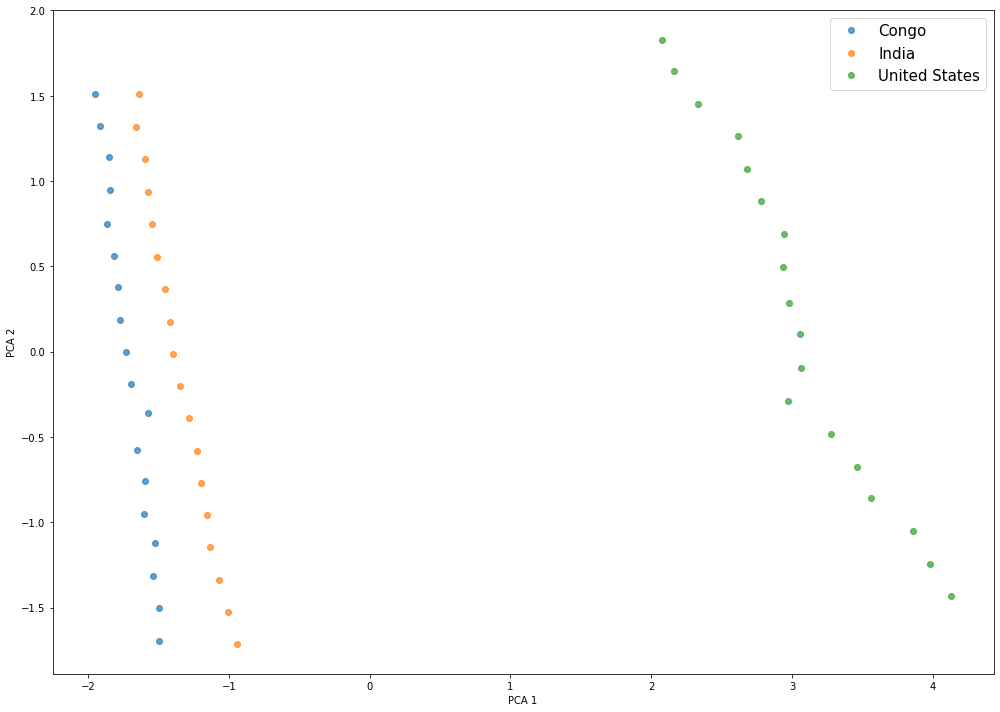

In [35]:

#normalizing the data
country = NEW_DATA.loc[:,'Entity']
country = country.reset_index()
country = country.drop(['index'],axis =1)   
country
data1 = NEW_DATA.drop(['Entity','Code'],axis =1)
standard_data = StandardScaler().fit_transform(data1)
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
finalDf = pd.concat([principalDf, country], axis = 1)
print(finalDf)
for key, group in finalDf.groupby(['Entity']):
    plt.plot(group.PCA1, group.PCA2, 'o', alpha=0.7, label=key)
    plt.legend(loc=0, fontsize=15)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')



After banging all 3 categories into two PCA variables and then ploting chart , It shows PCA 1 value for US is above average where as India and congo are below average. The 2nd PCA value looks similar for these countries.  

SUMMARY OF EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

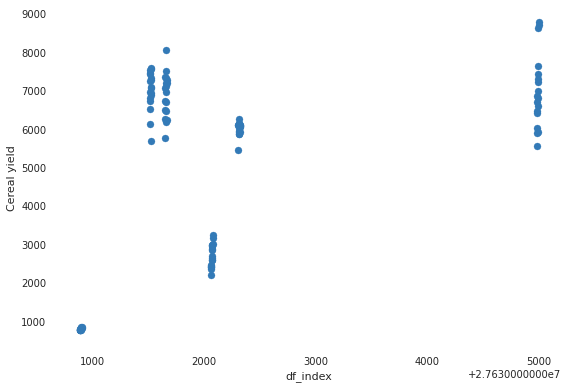

In [36]:
profile = ProfileReport(data, title ="Summary of Dataset", explorative =True)
profile.to_widgets()